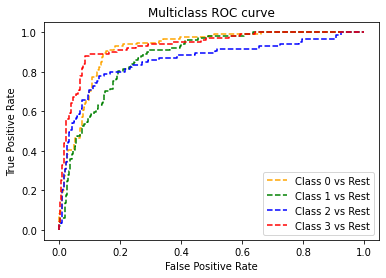

In [38]:
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification

# 가상의 분류모형 데이터를 생성
X, y = make_classification(n_samples=1000, # 표본 데이터의 수
                           n_classes=4,  # 종속 변수의 클래스 수
                           n_features=50, # 독립 변수의 수
                           n_informative=3, # 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수
                           random_state=33 # 난수 발생 시드
                          )

# train/ test 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, # 독립 변수 데이터
                                                    y,  # 종속 변수 데이터
                                                    test_size=0.4,  # 검증용 데이터 개수
                                                    random_state=33 # 난수 시드
                                                   )

#타깃 레이블의 개수 만큼 로지스틱 회귀 모델을 만들어 각 레이블을 타깃으로 하는 분류기를 학습시킴.
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train) # 훈련
pred = clf.predict(X_test) # Predict multiclass targets using underlying estimators
pred_prob = clf.predict_proba(X_test) # 확률 추정치



fpr = {} # FPR : False Positive Rate
tpr = {} # TPR : True Positive Rate
thresh = {} # threshholds : thresholds 이하 값은 False, 이상은 True
n_class = 4 # 클래스 수
for i in range(n_class):
    # 주어진 모델의 ROC 곡선을 반환
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test,#  Positive로 판단한 값이 False인지 True인지 판단하기위한 값
                                          pred_prob[:, i], # 예측확률
                                          pos_label=i)  # The label of the positive class

plt.plot(fpr[0], tpr[0], linestyle='--', color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--', color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--', color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--', color='red', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC', dpi=300)